In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#### Load Data to Pandas Dataframe

In [2]:
data1 = pd.read_json('../../data/raw/file0-555.json', orient='columns')

In [3]:
data2 = pd.read_json('../../data/raw/file1137-3025.json', orient='columns')

In [4]:
data3 = pd.read_json('../../data/raw/file556-1136.json', orient='columns')

In [5]:
# Combine out dataframes
data = pd.concat([data1, data2, data3])

In [6]:
# Check that we haven't lost any rows
len(data) == len(data3) + len(data2) + len(data1)

True

#### Explore datasets

In [7]:
data.describe()

duration        index_     magnitude       project  repetitions
count  1474748.0  1.474748e+06  1.474748e+06  1.261569e+06    1474748.0
mean         0.0  7.373751e+05  1.746123e+01  1.369494e+03          1.0
std          0.0  4.257236e+05  1.783508e+01  2.715116e+03          0.0
min          0.0  1.000000e+00  0.000000e+00  4.000000e+00          1.0
25%          0.0  3.686878e+05  1.000000e+00  1.014000e+03          1.0
50%          0.0  7.373755e+05  1.000000e+00  1.014000e+03          1.0
75%          0.0  1.106062e+06  3.900000e+01  1.014000e+03          1.0
max          0.0  1.474749e+06  4.000000e+01  2.065500e+04          1.0

#### Group By Project_Id 

In [8]:
projects = data.groupby('project')['profile'].nunique().reset_index()
projects = projects.rename(index=str, columns={"profile": "num_profiles"})
# Count the number projects in the dataset
len(projects)

1783

In [9]:
# Print a summary of the number of profiles per project
projects.describe()

project  num_profiles
count   1783.000000   1783.000000
mean    7622.996635     56.131800
std     8602.336996    910.048491
min        4.000000      1.000000
25%      664.500000      4.000000
50%     1386.000000      9.000000
75%    17996.500000     24.000000
max    20655.000000  37059.000000

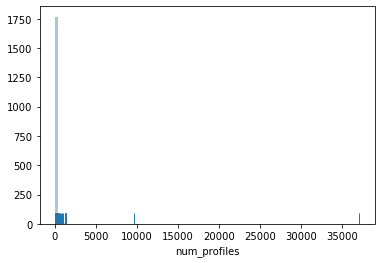

In [10]:
# Produce a histogram plot of the number of profiles per project
sns.distplot(projects['num_profiles'], bins=100, kde=False, rug=True)

So, clearly we have a small number (probably two) projects that are huge outliers. So let's remove them from the dataset and graph again

In [11]:
# Print the projects with the highest number of profile interactions
projects.sort_values(by=['num_profiles'], ascending=False)[0:5]

project  num_profiles
10       25.0         37059
80      169.0          9609
1267  17491.0          1356
1168  16864.0          1343
23       38.0          1302

Ok, so it looks like project 25 and project 169 are the two projects that have been hit the most.

#### Explore the Extra Field

In [12]:
# Describe all the rows where extra is not blank
data[data['extra'] != ''].describe()

duration        index_  magnitude       project  repetitions
count  221939.0  2.219390e+05   221939.0  15004.000000     221939.0
mean        0.0  8.243350e+05        1.0   3621.975540          1.0
std         0.0  4.280549e+05        0.0   6615.147331          0.0
min         0.0  1.605000e+03        1.0      7.000000          1.0
25%         0.0  4.897865e+05        1.0    421.000000          1.0
50%         0.0  8.162760e+05        1.0    421.000000          1.0
75%         0.0  1.207700e+06        1.0    421.000000          1.0
max         0.0  1.474748e+06        1.0  18005.000000          1.0

In [13]:
extras = data.groupby('extra')['project'].agg('count').reset_index()
extras = extras.rename(index=str, columns={"project": "num_interactions"})
extras

extra  num_interactions
0                                                                  1246565
1                                              CitSciBio                 0
2                                             CosmoQuest                75
3      Environment=&format=json&long=-76.4004515&topi...                 0
4      Environment=&format=json&long=-76.4004517&topi...                 0
5      Environment=&format=json&topic=Ecology&key=ef2...                 0
6      Environment=&format=json&topic=Ecology&key=ef2...                 0
7      Environment=&format=json&topic=Ecology&key=ef2...                 0
8      Environment=&format=json&topic=Ecology&key=ef2...                 0
9      Environment=&format=json&topic=Ecology&key=ef2...                 0
10     Environment=&format=json&topic=Ecology&key=ef2...                 0
11     Environment=&format=json&topic=Ecology&key=ef2...                 0
12     Environment=&format=json&topic=Ecology&key=ef2...                 0
13     Environment=&format=json&topic=Ecology&key=ef2...                 0
14     Environment=&format=json&topic=Ecology&key=ef2...                 0
15     Space=&format=json&long=-76.4002271&topic=Astr...                 0
16     Space=&format=json&long=-76.4004515&topic=Astr...                 0
17     Space=&format=json&long=-76.4004517&topic=Astr...                 0
18     Space=&format=json&topic=Astronomy&key=ef27033...                 0
19     Space=&format=json&topic=Astronomy&key=ef27033...                 0
20     Space=&format=json&topic=Astronomy&key=ef27033...                 0
21     Space=&format=json&topic=Astronomy&key=ef27033...                 0
22     Space=&format=json&topic=Astronomy&key=ef27033...                 0
23     Space=&format=json&topic=Astronomy&key=ef27033...                 0
24     Space=&format=json&topic=Astronomy&key=ef27033...                 0
25     Space=&format=json&topic=Astronomy&key=ef27033...                 0
26     activity=At&key=66328c61b486a81bcca99a74216e18...                 0
27       activity=At+a+science+center%2C+zoo+or+aquarium                 0
28     activity=At+a+science+center%2C+zoo+or+aquariu...                 0
29                                      activity=At+home                 0
...                                                  ...               ...
76238                                      {"user": 682}                 0
76239                                     {"user": 6920}                 0
76240                                     {"user": 6939}                 0
76241                                     {"user": 7163}                 0
76242                                     {"user": 7195}                 0
76243                                      {"user": 766}                 0
76244                                      {"user": 773}                 0
76245                                     {"user": 7891}                 0
76246                                       {"user": 79}                 0
76247                                        {"user": 7}                 0
76248                                     {"user": 8178}                 0
76249                                     {"user": 8180}                 0
76250                                     {"user": 8229}                 0
76251                                      {"user": 857}                 0
76252                                     {"user": 8629}                 0
76253                                       {"user": 86}                 0
76254                                     {"user": 8722}                 0
76255                                     {"user": 8788}                 0
76256                                     {"user": 8854}                 0
76257                                     {"user": 8900}                 0
76258                                     {"user": 8906}                 0
76259                                      {"user": 891}                 0
7

#### Explore the type field

In [14]:
interaction_types = data.groupby('type')['project'].agg('count').reset_index()
interaction_types = interaction_types.rename(index=str, columns={"project": "num_interactions"})

In [15]:
interaction_types

type  num_interactions
0                  Added a bookmark             24177
1                Added to dashboard             15281
2                  Asked a question                32
3            Bookmarked the project             24917
4    Classification / Transcription            719976
5       Clicked to join the project             37271
6                   Data collection             11963
7                Joined the project             82906
8   Marked themselves a participant              3216
9             Negate previous event              2708
10                      OAuth Login                75
11                     Participated            336400
12                Rated the project               155
13               Removed a bookmark              1748
14           Removed from dashboard               743
15                 Search in finder                 0
16                Started a project                 1
17                 Viewed a profile                 0

Note that there are some negation actions e.g. "negate previous event", "removed a bookmark", "removed from dashboard".

#### Group by profile

In [16]:
profile = data.groupby('profile')['project'].agg('count').reset_index()
profile = profile.rename(index=str, columns={"project": "num_interactions"})

In [17]:
profile.describe()

num_interactions
count      76382.000000
mean          16.516575
std         1116.981989
min            0.000000
25%            1.000000
50%            1.000000
75%            2.000000
max       237724.000000

It looks like the VAST majority of our users only have 2 or fewer interactions

In [18]:
ordered_profile = profile.sort_values('num_interactions', ascending=True).reset_index()